# Temas Selectos de Estadística
## Tarea 1 Ejercicio 3
### José Antonio Duarte Mendieta

## Ejercicio 3

La *metodología* para este ejercicio consiste en simular matrices de varianza covarianza y obtener (mediante simulación monte carlo) los valores propios de estas matrices para luego poder comparar los patrones que se presentan en la simulación contra los patrones que se presentan al utlizar las soluciones analíticas obtenidas en el ejercicio 2. 

Las simulaciones se realizan considerando la siguiente igualdad :

$$ \Sigma = \sigma_f^2LL^t + \sigma_\epsilon^2 I_p$$

Se toman valores de $p$ de 50 al 200, y para cada uno de estos valores de $p$ se realizan 100 estimaciones de $Sigma$, se obtienen los valores propios para cada estimación, se seleccionan los 5 valores propios más grandes y al final se promedian los valores propios de las 100 estmiaciones para estimar los valores propios de cada $p$.

Se asume que $L \sim N(b 11^t, \sigma_b^2 I)$ con $\sigma_b^2 = 0.01$, $b = 1$, $\sigma_f^2 = 0.000158$ y $\sigma_e^2 = 0.0045$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Se definen los parámetros y se elige una semilla aleatoria

In [4]:
np.random.seed(seed=13)
sig_f_cuad= 0.000158
b = 1
sig_e_cuad = 0.0045
val_k = 4
sig_b_cuad = 0.01
p = list(range(50, 201))
n = 80

Se procede a realizar la simulación y obtener los valores propios más grandes para cada p

In [5]:
# se crean placeholders para los resultados finales
medias_eigen = [[],[],[],[],[]]
quantil_75 = []
quantil_25 = []
traces_sigma = []
for val_p in p:
    res_eigen_sup=[[],[],[],[],[]]
    traces_temp =[]
    for iter in range(0,10):    
        # se genera la matriz identidad de tamaño pxp
        identidad_p = np.identity(val_p)
        # se samplea aleatoriamente la matriz L utilizando la distribución especificada al principio de
        # este notebook
        matriz_L = np.random.multivariate_normal(mean= b* np.ones(val_k), 
                                                 cov = sig_b_cuad*  np.identity(val_k),
                                                size = val_p)
        # Se calcula la matriz sigma con la matriz L que se sampleó y con los parámetros dados
        mat_sigma = sig_f_cuad * np.matmul(matriz_L,matriz_L.transpose()) + sig_e_cuad * np.identity(val_p)
        # Se calculan los valores propios
        eigenvals = np.real(np.around( np.linalg.eigvals(mat_sigma), decimals=5))
        # Se ordenan los valores propios de mayor a menor
        eigenvals[::-1].sort()
        # se colocan los cinco valores propios más grandes en sus placeholders correspondientes
        for i in range(0,5):
            res_eigen_sup[i].append(eigenvals[i])
        traces_temp.append(mat_sigma.trace())
    traces_sigma.append(np.mean(traces_temp))
    # se obtienen los interquantiles
    quantil_75.append(np.quantile(res_eigen_sup[0], 0.75))
    quantil_25.append(np.quantile(res_eigen_sup[0], 0.25))
    
    for i in range(0,5):
        medias_eigen[i].append(np.mean(res_eigen_sup[i]))

Se procede a graficar los 5 valores propios más grandes obtenidos mediante simulación monte carlo, y se ponen los interquantiles en líneas punteadas.

Text(0.5, 1.0, '5 eigenvalues más grandes para diferentes valores de p')

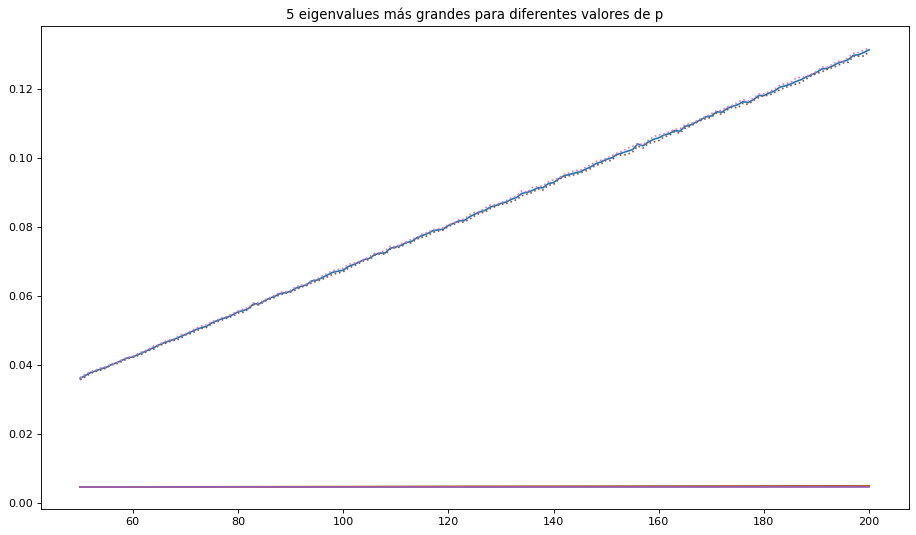

In [8]:
figure(figsize=(14, 8), dpi=80)

for ei in medias_eigen:
    plt.plot(p,ei)

plt.plot(p,quantil_25,ls= "dotted")
plt.plot(p,quantil_75, ls = "dotted")
plt.title("5 eigenvalues más grandes para diferentes valores de p")

Se puede observar que a medida que incrementa $p$, el valor propio más grande de la matriz $\Sigma$ aumenta de forma considerable, mientras que los valores propios del 2 al $k$ también aumentan pero no de forma considerable y que los valores propios del $k+1$ al $p$ prácticamente se mantienen constantes. 

Ahora se procede a obtener los 5 valores propios utilizando los parámetros dados pero esta vez mediante la solución analítica. 

In [9]:
eigens_analitica = [[],[],[],[],[]]
var_explicada_5 = []
for val_p in p:
  resultados_p = []
  resultados_p.append(val_p * sig_f_cuad *(sig_b_cuad + val_k * b**2) + sig_e_cuad)  
  for val_i in range(1,val_k):
    resultados_p.append(val_p * sig_f_cuad * sig_b_cuad + sig_e_cuad)
  for val_j in range(val_k, val_p):
    resultados_p.append(sig_e_cuad) 
  resultados_p.sort(reverse=True)
  cinco_top = resultados_p[0:5]
  for i in range(0,5):
    eigens_analitica[i].append(cinco_top[i])
  var_explicada_5.append(np.sum(np.abs(cinco_top))*100)  
  


Una vez obtenidos los valores propios, se grafican los resultados para los distintos valores de $p$

Text(0.5, 1.0, '5 valores propios más grandes obtenidos analíticamente')

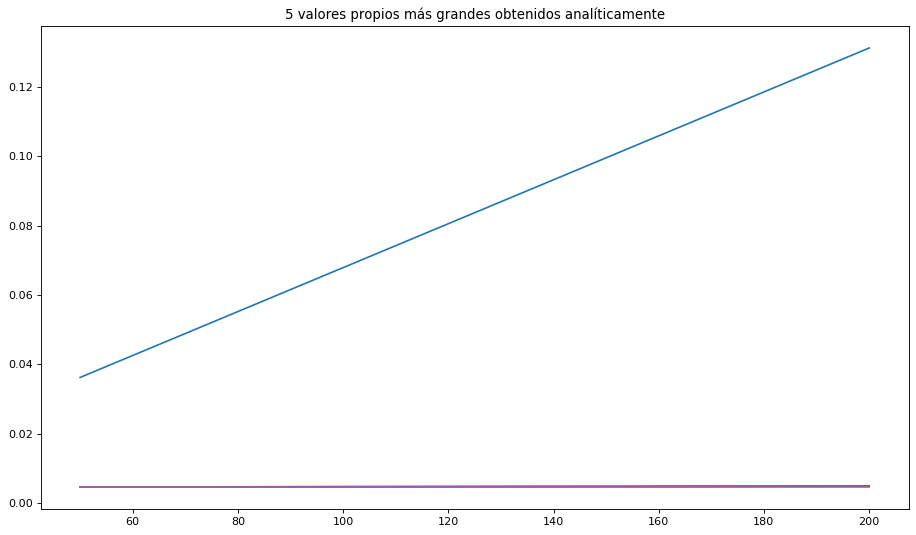

In [12]:
figure(figsize=(14,8), dpi=80)
for ei in eigens_analitica:
    plt.plot(p, ei)
plt.title("5 valores propios más grandes obtenidos analíticamente")

Se puede observar un comportamiento muy similar con respecto a la simulación hecha anteriormente, es decir, el valor propio más grande crece sin límite cuando $p$ crece, del segundo al $k$ valor propio hay un aumento, pero es pequeño comparado con el aumento del primer valor propio, y el $k+1$ al $p$ valor propio no hay aumento, los valores propios se mantienen constantes.

También es posible sobre poner los valores propios obtenidos mediante simulación (color azul) y compararlos contra los valores propios obtenidos analíticamente(color rojo), como se hace a continuación.

Text(0.5, 1.0, '5 valores propios más grandes obtenidos analíticamente')

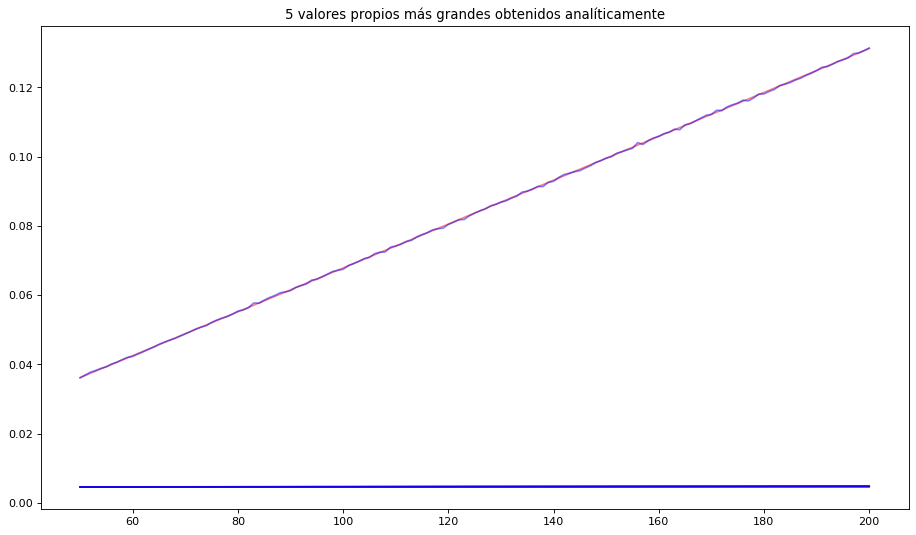

In [19]:
figure(figsize=(14,8), dpi=80)
for ei in eigens_analitica:
    plt.plot(p, ei, color = "red", alpha = 0.5)
for ei in medias_eigen:
    plt.plot(p, ei, color = "blue", alpha = 0.5)
plt.title("5 valores propios más grandes obtenidos analíticamente")

Es posible observar que los valores obtenidos analíticamente se asemejan bastante a los valores simulados, lo que demuestra empíricamente que la solución analítica es correcta. 

Dado que el modelo APT está basado en un análisis de factores, la cantidad que cada factor $f_i$ contribuye a explicar la varianza total de los retornos $R$ está dada por el valor propio asociado $\lambda_i$. Esto permite deducir que aún cuando se añaden más activos al portafolio (i.e. se aumenta el valor de $p$) siempre existirá un factor (asociado al valor propio más grande) que va a ser significativamente más determinante e importante para explicar la varianza de los rendimientos, sin importar que se añadan más y más activos al portafolio.

De forma más particular, Stephen Brown en *The Number of Factors in Security Returns* , publicado en 1989, afirma que en la literatura se ha encontrado que este factor sería el índice del mercado, lo cuál tendría sentido, pues dicho índice representa la tendencia general del desempeño de todos los activos y por lo tanto explicaría gran parte de los retornos. 

